# Multiple Linear Regression for Robot Calibration

In this lab, we will illustrate the use of multiple linear regression for calibrating robot control.  In addition to reviewing the concepts in the [multiple linear regression demo](./glucose.ipynb), you will see how to use multiple linear regression for time series data -- an important concept in dynamical systems such as robotics.

The robot data for the lab is taken generously from the TU Dortmund's [Multiple Link Robot Arms Project](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html).  As part of the project, they have created an excellent public dataset: [MERIt](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html#h3MERIt) -- A Multi-Elastic-Link Robot Identification Dataset that can be used for understanding robot dynamics.  The data is from a three link robot:

<img src="http://www.rst.e-technik.tu-dortmund.de/cms/Medienpool/redaktionelleBilder/Forschung/Schwerpunkte/TUDOR_engl/TUDORBild.png" height="200" width="200">


We will focus on predicting the current draw into one of the joints as a function of the robot motion.  Such models are essential in predicting the overall robot power consumption.  Several other models could also be used.

## Load and Visualize the Data
First, import the modules we will need.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The full MERIt dataset can be obtained from the [MERIt site](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html#h3MERIt).  But, this dataset is large.  Included in this repository are two of the ten experiments.  Each experiments corresonds to 80 seconds of recorded motion.  We will use the following files:
* [exp1.csv](./exp1.csv) for training
* [exp2.csv](./exp2.csv) for test

Below, I have supplied the column headers in the `names` array.  Use the `pd.read_csv` command to load the data.  Use the `index_col` option to specify that column 0 (the one with time) is the *index* column.  You can review [simple linear regression demo](../simp_lin_reg/auto_mpg.ipynb) for examples of using the `pd.read_csv` command.

In [3]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]
# TODO 
df = pd.read_csv('exp1.csv',
                 index_col=0,names=names,na_values='?')

Print the first six lines of the pandas dataframe and manually check that they match the first rows of the csv file.

In [4]:
# TODO
df.head(6)

,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
t,,,,,,,,,,,,,,,,
0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


From the dataframe `df`, extract the time indices into a vector `t` and extract `I2`, the current into the second joint.  Place the current in a vector `y` and plot `y` vs. `t`.  

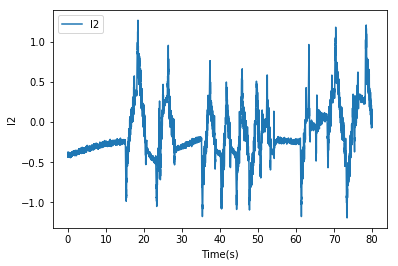

In [6]:
# TODO
t =df.index.values #extracting time indices into t
y = df['I2'] #Extracting I2 into y 
plt.plot(t,y) #plotting
plt.xlabel('Time(s)')
plt.ylabel('I2')
plt.legend(['I2'])
plt.show()

Use all the samples from the experiment 1 dataset to create the training data:
* `ytrain`:  A vector of all the samples from the `I2` column
* `Xtrain`:  A matrix of the data with the columns:  `['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']`

In [7]:
# TODO
ytrain = df['I2'] #training labels
Xtrain = df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']] #training features

## Fit a Linear Model
Use the `sklearn.linear_model` module to create a `LinearRegression` class `regr`.

In [8]:
from sklearn import linear_model

# Create linear regression object
# TODO
regr = linear_model.LinearRegression() #instantiating the model

Train the model on the training data using the `regr.fit(...)` method.

In [9]:
regr.fit(Xtrain,ytrain) #training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Plot the predicted and actual current `I2` over time on the same plot.  Create a legend for the plot.

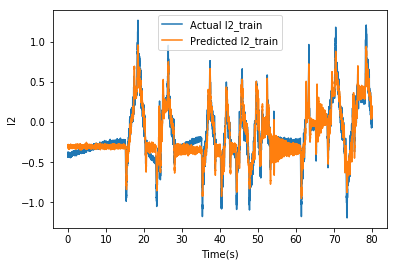

In [10]:
# TODO
#plotting predicted and actual current
I2_pred = regr.predict(Xtrain) #storing predictions in a vector

t =df.index.values #extracting time indices into t
y = df['I2'] #actual I2 values

#plotting
plt.plot(t,y)
plt.plot(t,I2_pred)
plt.xlabel('Time(s)')
plt.ylabel('I2')
plt.legend(['Actual I2_train','Predicted I2_train'])
plt.show()

Measure the normalized RSS given by 
$$
    \frac{RSS}{n s^2_y}.
$$

In [28]:
# TODO
#Normalized RSS for training set 
n = len(t) #number of training examples 
y_np = np.array(y) #converting to a numpy array
y_pred_np = np.array(I2_pred) #converting to a numpy array

var = np.var(y_np) #variance of the training set labels
RSS_train = np.mean((y-y_pred_np)**2)/var #normalized RSS for the training set
print(' Normalized RSS for training set: ' +str(RSS_train))

 Normalized RSS for training set: 0.0958326386123


## Measure the Fit on an Indepdent Dataset

Load the data in `exp2.csv`.  Compute the regression predicted values on this data and plot the predicted and actual values over time.

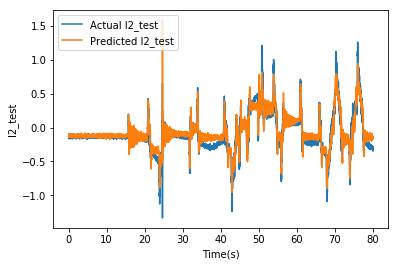

In [21]:
#TEST SET 
df2 = pd.read_csv('exp2.csv',
                 index_col=0,names=names,na_values='?')
df2.head(6)

t2 =df2.index.values #extracting time indices from test set into t2
y2 = df2['I2'] #Extracting I2 into y2
ytest = df2['I2'] #testing labels
Xtest = df2[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']] #testing features
I2_test_predict = regr.predict(Xtest) #predicting values for the test set

#plotting
plt.plot(t2,y2) #actual values in the test set
plt.plot(t2,I2_test_predict) #predicted values in the test set
plt.xlabel('Time(s)')
plt.ylabel('I2_test')
plt.legend(['Actual I2_test','Predicted I2_test'])
plt.show()

Measure the normalized RSS on the test data.  Is it substantially higher than the training data?

In [30]:
var = np.var(ytest) #variance of the test set labels
RSS_test = np.mean((ytest-I2_test_predict)**2)/var #normalized RSS for the test set
print('Normalized RSS for test set: ' + str(RSS_test))

RSS_diff = RSS_test - RSS_train
print('\nThe normalized RSS for the test set is higher than the normalized RSS for the training set by ' + str(RSS_diff))

Normalized RSS for test set: 0.12678048804762418

The normalized RSS for the test set is higher than the normalized RSS for the training set by 0.0309478494353


In [1]:
pwd

'C:\\Users\\Suhaila Shakiah\\ml\\lab2'